In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 28th, 2024 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W1/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
from hashlib import sha1
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import shap

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler



<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

1) We pick **Option 1** as our topic of interest.
2) Goal: Estimate whether a person will fail to pay their credit card bill
   <br> Target Variable: **default.payment.next.month** is our binary classification (1 = yes, 0 = no) which indicates whether a client will fail to pay their credit card bill in the next month.
   <br> Predictor Variables: Features include personal information (sex, age, education, martial status) along with their financial information (credit limit, bill statement, repayment)
   I believe not all features such as ID will be necessary for our classification model and we may require scaling for numerical features such as Bill and payment amounts.
4) Below, we will read and tidy the data.

In [3]:
# Load data
cc_data = pd.read_csv("data/UCI_Credit_Card.csv")
cc_data.head(6)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
X = cc_data.drop(columns=['default.payment.next.month'])  
y = cc_data['default.payment.next.month']

trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=123)
display(trainX.head())
display(testX.head())
display(trainY.head())
display(testY.head())

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
16395,16396,320000.0,2,1,2,36,0,0,0,0,...,28695.0,19370.0,10155.0,3788.0,5000.0,5018.0,1000.0,3000.0,0.0,7013.0
21448,21449,440000.0,2,1,2,30,-1,-1,-1,0,...,87426.0,171244.0,150897.0,117870.0,612.0,87426.0,130007.0,3018.0,15000.0,51663.0
20034,20035,160000.0,2,3,1,44,-2,-2,-2,-2,...,-18.0,-18.0,-18.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0
25755,25756,120000.0,2,2,1,30,0,0,0,0,...,104694.0,103058.0,71095.0,47379.0,3706.0,5502.0,4204.0,3017.0,2005.0,1702.0
1438,1439,50000.0,1,2,2,54,1,2,0,0,...,27168.0,27585.0,27910.0,27380.0,0.0,1400.0,1200.0,1500.0,1000.0,1500.0


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
25665,25666,40000.0,2,2,2,26,-1,0,0,0,...,13600.0,0.0,44024.0,18697.0,1300.0,1000.0,0.0,22373.0,680.0,10000.0
16464,16465,80000.0,2,3,1,59,0,0,0,0,...,53169.0,50875.0,50372.0,49470.0,3212.0,2106.0,2000.0,1603.0,1903.0,2006.0
22386,22387,170000.0,2,1,2,30,2,2,2,2,...,161487.0,157577.0,168094.0,170922.0,6800.0,6500.0,0.0,13000.0,5500.0,1000.0
10149,10150,200000.0,2,2,1,41,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,742.0,0.0,0.0,0.0,0.0,0.0
8729,8730,50000.0,1,2,1,43,0,0,0,0,...,9044.0,9225.0,9417.0,9617.0,1140.0,1150.0,331.0,341.0,356.0,330.0


16395    0
21448    0
20034    0
25755    0
1438     0
Name: default.payment.next.month, dtype: int64

25665    0
16464    0
22386    1
10149    1
8729     0
Name: default.payment.next.month, dtype: int64

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

In [5]:
trainX.shape

(21000, 24)

In [6]:
trainX.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,47010.414095,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,69035.759516,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-157264.000000,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2663.750000,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,20088.500000,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,59895.000000,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,855086.000000,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000


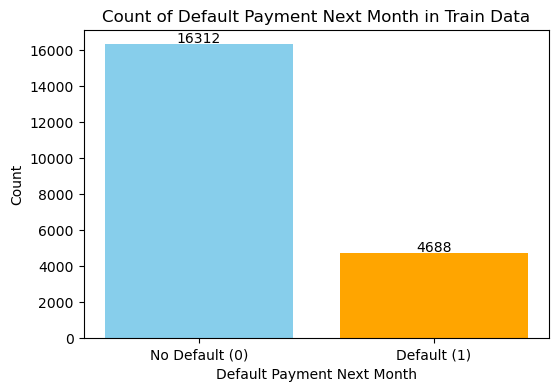

In [7]:
trainY_counts = trainY.value_counts()

plt.figure(figsize=(6, 4))
plt.bar(trainY_counts.index, trainY_counts.values, color=['skyblue', 'orange'])

plt.xticks([0, 1], ['No Default (0)', 'Default (1)'])

plt.xlabel('Default Payment Next Month')
plt.ylabel('Count')
plt.title('Count of Default Payment Next Month in Train Data')

for i, count in enumerate(trainY_counts.values):
    plt.text(trainY_counts.index[i], count + 100, str(count), ha='center')

plt.show()

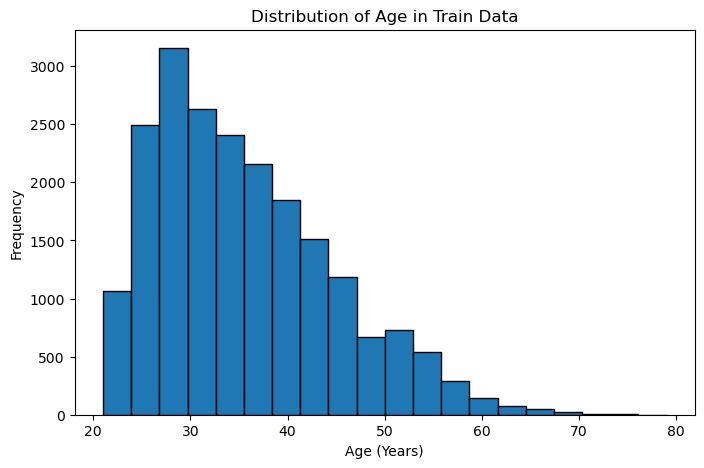

In [8]:
plt.figure(figsize=(8, 5))
plt.hist(trainX['AGE'], bins=20, edgecolor='black')

plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.title('Distribution of Age in Train Data')

plt.show()

*From the analysis above we see that we have 24 available columns to choose from as features and 21,000 observations. Furthermore, we can get a summary of each feature with the table produced by calling describe on trainX above: mean LIMIT_BALL = 167880.651429, mean BILL_AMT3 = 47010.414095, etc. From looking at the counts for the target variable we see an imbalance between classes with the no-default class having a significantly higher count than the default. We also have a distribution for age in the data. The ages are skewed and are mostly centred around mid 20s - late 30s with a median of around 30.*

*We will choose to use accuracy, precision, and recall as metrics to judge the accuracy of our classification model.*

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [9]:
# Different feature types
numeric_feats = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
categorical_feats = ['SEX', 'MARRIAGE']
ordinal_feats = ['EDUCATION', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
drop_feats = ['ID']

ordinal_feats_ordering = [
    [1,2,3,4,5,6],
    [-2,-1,1,2,3,4,5,6,7,8],
    [-2,-1,1,2,3,4,5,6,7,8],
    [-2,-1,1,2,3,4,5,6,7,8],
    [-2,-1,1,2,3,4,5,6,7,8],
    [-2,-1,1,2,3,4,5,6,7,8],
    [-2,-1,1,2,3,4,5,6,7,8]
]

# Transformers
scaler = StandardScaler()
onehot_encoder = OneHotEncoder(drop="if_binary", handle_unknown="ignore", sparse_output=False)

# Add an imputer to handle missing values (0s) in the ordinal features
ordinal_pipeline = make_pipeline(
    SimpleImputer(missing_values=0, strategy='most_frequent'),
    OrdinalEncoder(categories=ordinal_feats_ordering)
)

# Column Transformer
preprocessor = make_column_transformer(
    (scaler, numeric_feats),
    (onehot_encoder, categorical_feats),
    (ordinal_pipeline, ordinal_feats),  
    ("drop", drop_feats)
)

# Fit and transform the data
train_X_transformed = preprocessor.fit_transform(trainX)

# Generate appropriate column names based on transformations
onehot_encoded_cols = preprocessor.named_transformers_['onehotencoder'].get_feature_names_out(categorical_feats)

# Combine all the new column names
new_columns = numeric_feats + list(onehot_encoded_cols) + ordinal_feats

# Create the DataFrame
train_X_enc = pd.DataFrame(train_X_transformed, index=trainX.index, columns=new_columns)

# Display the encoded DataFrame
train_X_enc.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
16395,1.168355,0.054187,-0.300665,-0.293394,-0.265310,-0.371930,-0.494781,-0.587035,-0.039546,-0.040229,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
21448,2.090017,-0.597108,-0.685307,-0.679495,0.585444,1.970295,1.805461,1.327534,-0.297166,3.739796,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
20034,-0.060527,0.922579,-0.696132,-0.688319,-0.681234,-0.670935,-0.661045,-0.650908,-0.333097,-0.270403,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
25755,-0.367748,-0.597108,0.687456,0.752583,0.835581,0.918719,0.501203,0.144527,-0.115517,-0.018028,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1438,-0.905384,2.008070,-0.040230,-0.031399,-0.287429,-0.245237,-0.204599,-0.191104,-0.333097,-0.206185,...,0.0,1.0,0.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

**Full Correlation Matrix**

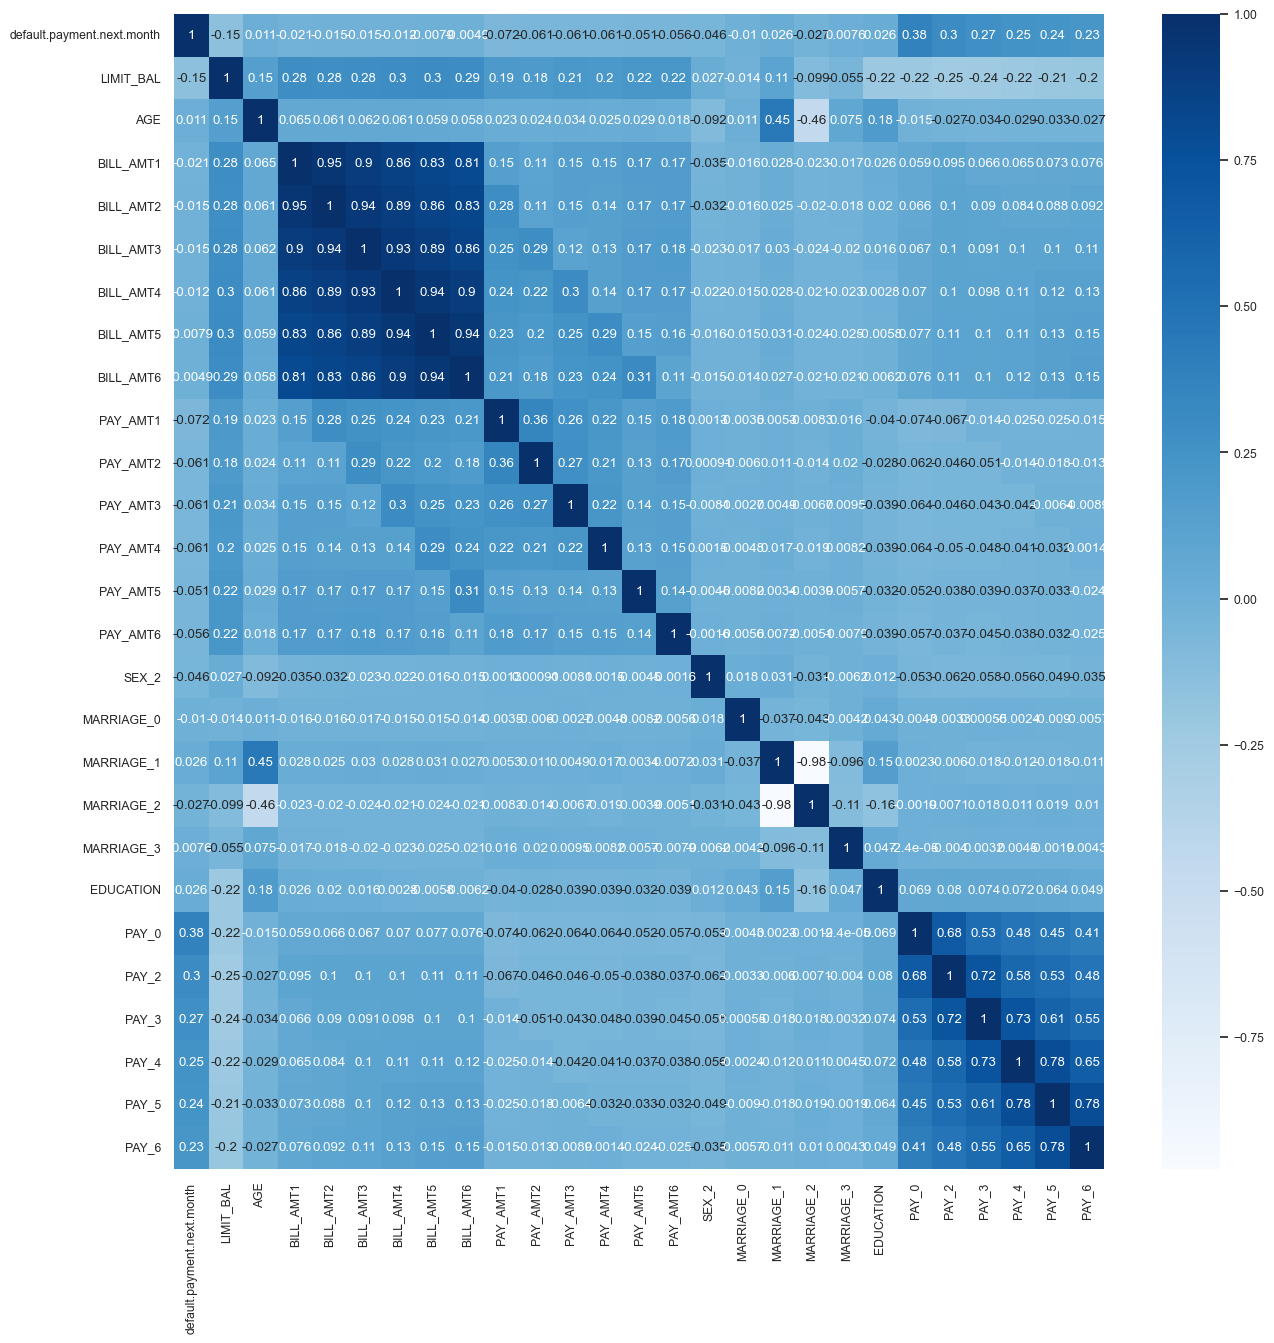

In [10]:
# From Lecture 13
cor = pd.concat((trainY, train_X_enc), axis=1).iloc[:, :].corr()
plt.figure(figsize=(15, 15))
sns.set(font_scale=0.8)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);

Given the strong correlations observed in the payment amounts, indicated by the dark blue region on the heatmap. We will further investigate this area in the following code.

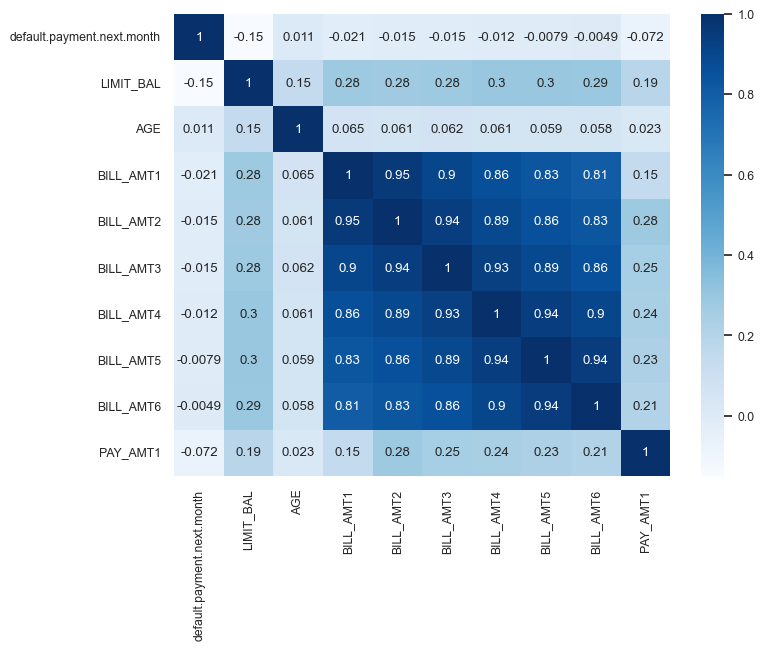

In [11]:
# From Lecture 13
cor = pd.concat((trainY, train_X_enc), axis=1).iloc[:, :10].corr()
plt.figure(figsize=(8, 6))
sns.set(font_scale=0.8)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);

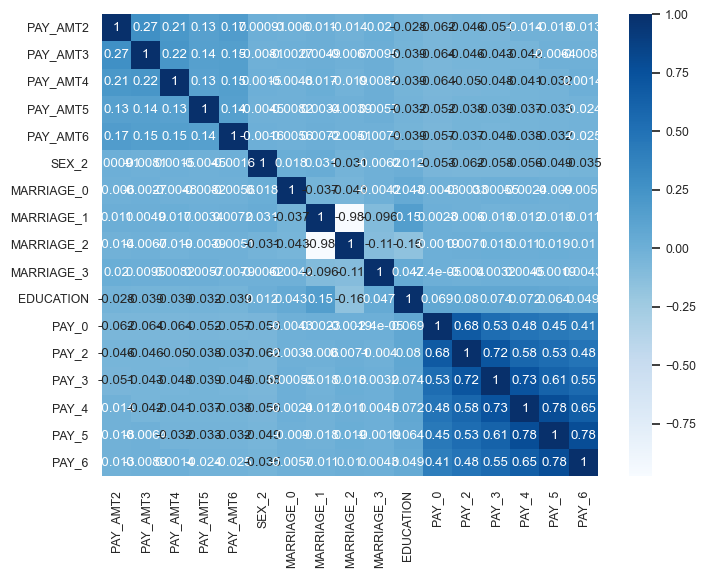

In [12]:
# From Lecture 13
cor = pd.concat((trainY, train_X_enc), axis=1).iloc[:, 10:27].corr()
plt.figure(figsize=(8, 6))
sns.set(font_scale=0.8)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);

After some preliminary preprocessing of the data and checking out the partial correlation between the different variables, we noticed a high correlation between the different BILL_AMT variables. So to keep these relevant variables but to reduce the potential of multicollinearity in our model, we will replace these with an average as seen below. The full correlation matrix can be seen below as well.

In [13]:
# Calculate average bill amount 
trainX['avg_bill_amt'] = trainX[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
testX['avg_bill_amt'] = testX[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)


trainX.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,avg_bill_amt
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,44987.856262
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,63465.528940
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.166667
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,4750.125000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,21043.250000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,57113.625000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,877313.833333


In [14]:
# Column Transformer
preprocessor = make_column_transformer(
    (scaler, numeric_feats),
    (onehot_encoder, categorical_feats),
    (ordinal_pipeline, ordinal_feats),
    ("drop", drop_feats)
)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [15]:
pipe_dummy = make_pipeline(preprocessor, DummyClassifier(strategy='most_frequent', random_state=123))
pipe_dummy.fit(trainX, trainY)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=F...
                                                                   OrdinalEncoder(categories=[[1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6],
                                                                                              [-2,
                                                                                               -1,
                                                                                               1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6,
                                                                                               7,
                                                                                               8],
                                                                                              [-2,
                                                                                               -1,
                                                                                               1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6,
                                                                                               7,
                                                                                               8],
                                                                                              [-2,
                                                                                               -1,
                                                                                               1,
                                                                                               2,
                           

In [16]:
train_predictions = pipe_dummy.predict(trainX)
test_predictions = pipe_dummy.predict(testX)

print("Training Accuracy:", accuracy_score(trainY, train_predictions))
print("Testing Accuracy:", accuracy_score(testY, test_predictions))
print("\nClassification Report for Test Set:\n", classification_report(testY, test_predictions, zero_division=0))

Training Accuracy: 0.7767619047619048
Testing Accuracy: 0.7835555555555556

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      7052
           1       0.00      0.00      0.00      1948

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000



Our `DummyClassifier` produced 76% **training accuracy**, 78% **test accuracy**, 78% **precision**, 100% **recall**, and 0.88 **f1-score**.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

**Hyperparameter Search on Logistic Regressor**

In [17]:
train_scores = []
cv_scores = []
sd = []
C_vals = 10.0 ** np.arange(-4, 4, 1)

for C in C_vals:
    pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, C=C, random_state=123))
    cv_results = cross_validate(pipe, trainX, trainY, return_train_score=True)
    train_scores.append(cv_results["train_score"].mean())
    cv_scores.append(cv_results["test_score"].mean())
    sd.append(cv_results["test_score"].std())

pd.DataFrame({"C": C_vals, "train": train_scores, "cv": cv_scores, "std": sd})

pipe_ = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, C=1, random_state=123))

**C=1.0** is giving us the best cv-score from our hyperparameter search; *mean train score = 0.817500, cv-score = 0.817095, sd = 0.002691*

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

We will be trying 3 other models aside from the linear model, namely the Tree-based Ensemble model, K-Nearest Neighbor, and in sequential order

In [18]:
# From lecture 3 (Function for average table)
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation
    """
    
    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)
    
results = {}

### 1) Tree based Ensemble Model

In [19]:
# Tree Based ensemble model
trainY.value_counts(normalize=True)


default.payment.next.month
0    0.776762
1    0.223238
Name: proportion, dtype: float64

In [20]:
label_encoder = LabelEncoder()
y_train_num = label_encoder.fit_transform(trainY)
y_test_num = label_encoder.transform(testY)

In [21]:
# From Lecture 12
pipe_rf = make_pipeline(
    preprocessor,
    RandomForestClassifier(
        n_jobs=-1,
        random_state=123,
    ),
)

pipe_svm = make_pipeline(preprocessor, SVC(random_state=123))
randomForest_score = cross_validate(pipe_svm, trainX, trainY, scoring='accuracy', return_train_score=True)
pd.DataFrame(randomForest_score)

,fit_time,score_time,test_score,train_score
0,18.861932,4.283191,0.814286,0.825298
1,20.572406,5.052691,0.814762,0.824345
2,17.747570,5.151842,0.824048,0.822381
3,21.358277,4.370522,0.822619,0.822560
4,19.461558,4.142716,0.817143,0.824524


In [22]:
# RandomForestClassifier
results["Random forests"] = mean_std_cross_val_scores(
    pipe_rf, trainX, y_train_num, return_train_score=True, scoring="accuracy"
)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Random forests,4.523 (+/- 0.336),0.084 (+/- 0.017),0.814 (+/- 0.004),0.999 (+/- 0.000)


As of the table above, we see that random Forests takes more time on average which is reasonable as it’s a complex ensemble model with multiple decision trees. We also see that Random Forests shows a train score of 0.999 which indicates overfitting while its test score performs significantly better than the DummyClassifier's meaning that it would perform  on unseen data better than DummyClassifier.

2) K-nearest neighbor using

In [23]:
# From Lecture 4
results_dict = {
    "n_neighbors": [],
    "mean_train_score": [],
    "mean_cv_score": [],
    "std_cv_score": [],
    "std_train_score": [],
}
param_grid = {"n_neighbors": np.arange(1, 50, 5)}

for k in param_grid["n_neighbors"]:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, trainX, trainY, return_train_score=True)
    results_dict["n_neighbors"].append(k)

    results_dict["mean_cv_score"].append(np.mean(scores["test_score"]))
    results_dict["mean_train_score"].append(np.mean(scores["train_score"]))
    results_dict["std_cv_score"].append(scores["test_score"].std())
    results_dict["std_train_score"].append(scores["train_score"].std())

results_df = pd.DataFrame(results_dict)

results_df = results_df.set_index("n_neighbors")
results_df


,mean_train_score,mean_cv_score,std_cv_score,std_train_score
n_neighbors,,,,
1,1.000000,0.685857,0.005953,0.000000
6,0.801310,0.766238,0.003106,0.001457
11,0.790940,0.763429,0.003025,0.001535
16,0.784869,0.772905,0.001784,0.000911
21,0.782321,0.771143,0.001778,0.000826
26,0.780464,0.774429,0.002585,0.000704
31,0.779798,0.772905,0.001883,0.000722
36,0.779393,0.775429,0.001686,0.000570
41,0.778869,0.774429,0.001343,0.000919


Based on the above observation, we see that neighbours = 11 is the most optimal hyperparameter which we will use to evaluate its scores at 5 folds

In [24]:
knn = KNeighborsClassifier(n_neighbors = 11)

knn_results = cross_validate(knn, trainX, trainY, return_train_score=True)
pd.DataFrame(knn_results)

,fit_time,score_time,test_score,train_score
0,0.046624,0.792196,0.768810,0.789107
1,0.007942,0.455858,0.764524,0.790179
2,0.007946,0.441104,0.761905,0.789881
3,0.007858,0.531475,0.761667,0.792917
4,0.015765,1.273037,0.760238,0.792619


In [25]:
# Calculate mean and std for each score type
results["KNN Classifier"] = mean_std_cross_val_scores(
    knn, trainX, y_train_num, return_train_score=True, scoring="accuracy"
)

pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Random forests,4.523 (+/- 0.336),0.084 (+/- 0.017),0.814 (+/- 0.004),0.999 (+/- 0.000)
KNN Classifier,0.015 (+/- 0.015),0.581 (+/- 0.114),0.763 (+/- 0.003),0.791 (+/- 0.002)


KNN Classifier performs similarly to the Dummy Classifier in terms of accuracy, indicating it might not be a strong model for this dataset.


### 3)  Support Vector Machine (SVM)

In [26]:
# Lecture 4
pipe_svm = make_pipeline(preprocessor, SVC(random_state=123))
svmScores = cross_validate(pipe_svm, trainX, trainY, scoring='accuracy', return_train_score=True)

pd.DataFrame(svmScores)

,fit_time,score_time,test_score,train_score
0,18.112346,4.539808,0.814286,0.825298
1,14.974248,4.169640,0.814762,0.824345
2,14.438919,4.316478,0.824048,0.822381
3,19.333953,4.364335,0.822619,0.822560
4,16.249445,4.243066,0.817143,0.824524


In [27]:
# Average fit, score, test, and train time across the other models
results["SVM"] = mean_std_cross_val_scores(
    pipe_svm, trainX, y_train_num, return_train_score=True, scoring="accuracy"
)

# Display the results as a DataFrame
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Random forests,4.523 (+/- 0.336),0.084 (+/- 0.017),0.814 (+/- 0.004),0.999 (+/- 0.000)
KNN Classifier,0.015 (+/- 0.015),0.581 (+/- 0.114),0.763 (+/- 0.003),0.791 (+/- 0.002)
SVM,21.031 (+/- 6.365),4.402 (+/- 0.337),0.819 (+/- 0.005),0.824 (+/- 0.001)


Due to the long training and prediction time to list all the possible C and gamma hyperparameter for optimization, we will choose the default SVM Model (C=1.0, gamma='scale'). As a result, it displays a long training and prediction times while producing similar test and training score as the Dummy and Tree Random Forest Model.

In [28]:
pipe_lr = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, C=1, random_state=123))
lr_scores = cross_validate(pipe_lr, trainX, trainY, scoring='accuracy', return_train_score=True)

pd.DataFrame(lr_scores)

,fit_time,score_time,test_score,train_score
0,0.272452,0.047635,0.813571,0.819464
1,0.253645,0.021328,0.815476,0.818095
2,0.257637,0.020181,0.818095,0.816488
3,0.187382,0.014845,0.820952,0.815417
4,0.237581,0.040388,0.815000,0.816548


In [29]:
results["Logistic Regression"] = mean_std_cross_val_scores(
    pipe_lr, trainX, y_train_num, return_train_score=True, scoring="accuracy"
)

# Display the results as a DataFrame
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Random forests,4.523 (+/- 0.336),0.084 (+/- 0.017),0.814 (+/- 0.004),0.999 (+/- 0.000)
KNN Classifier,0.015 (+/- 0.015),0.581 (+/- 0.114),0.763 (+/- 0.003),0.791 (+/- 0.002)
SVM,21.031 (+/- 6.365),4.402 (+/- 0.337),0.819 (+/- 0.005),0.824 (+/- 0.001)
Logistic Regression,0.207 (+/- 0.025),0.021 (+/- 0.011),0.817 (+/- 0.003),0.817 (+/- 0.002)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

In Section 4) Feature engineering, we observed a strong correlation of the Bill amount from April to Aug 2005. To retain these important variables while minimizing the risk of multi-collinearity in our model, we will replace them with their mean.

**Adding new average columns**

In [18]:
# Calculate average bill amount 
trainX['avg_bill_amt'] = trainX[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
testX['avg_bill_amt'] = testX[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)


trainX.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,avg_bill_amt
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,44987.856262
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,63465.528940
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.166667
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,4750.125000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,21043.250000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,57113.625000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,877313.833333


In [31]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# Using our Train test splits made in Section 2)
# Fit and transform the training &  test data
trainX_transformed = preprocessor.fit_transform(trainX) # COULD BE WRONG!
rfecv = RFECV(estimator=DecisionTreeClassifier(random_state=123), step=1, scoring="neg_mean_squared_error", cv=5, verbose=1, n_jobs=-1)

rfecv.fit(trainX, trainY)
trainX_selected = rfecv.transform(trainX)
testX_selected = rfecv.transform(testX)

print("Optimal # of features is: {}".format(rfecv.n_features_))


Fitting estimator with 25 features.
Optimal # of features is: 24


In [32]:
# Not using RFE with Cross-Validation
rfe = RFE(estimator = DecisionTreeClassifier(), n_features_to_select = 3)
rfe.fit(trainX, trainY)
for i, col in zip(range(trainX.shape[1]), trainX.columns):
    print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

ID selected=True rank=1
LIMIT_BAL selected=False rank=7
SEX selected=False rank=21
EDUCATION selected=False rank=17
MARRIAGE selected=False rank=20
AGE selected=False rank=4
PAY_0 selected=False rank=2
PAY_2 selected=False rank=15
PAY_3 selected=False rank=22
PAY_4 selected=False rank=18
PAY_5 selected=False rank=23
PAY_6 selected=False rank=19
BILL_AMT1 selected=True rank=1
BILL_AMT2 selected=False rank=16
BILL_AMT3 selected=False rank=11
BILL_AMT4 selected=False rank=12
BILL_AMT5 selected=False rank=14
BILL_AMT6 selected=False rank=3
PAY_AMT1 selected=False rank=9
PAY_AMT2 selected=False rank=5
PAY_AMT3 selected=False rank=6
PAY_AMT4 selected=False rank=10
PAY_AMT5 selected=False rank=13
PAY_AMT6 selected=False rank=8
avg_bill_amt selected=True rank=1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

In [33]:
param_grid = {"logisticregression__C": 10.0 ** np.arange(-4, 6, 1)}
pipelr = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, C=1, random_state=123))

lr_search_multi = GridSearchCV(
    pipelr,
    param_grid,
    scoring='accuracy',
    return_train_score=True,
    n_jobs=-1,
)

lr_search_multi.fit(trainX, trainY)

results_table = {}
results_table["Linear Regression"] = {
    "Best hyperparameter values:": f"{lr_search_multi.best_params_}",
    "Best score:": f"{lr_search_multi.best_score_}",
}

pd.DataFrame(results_table).T


,Best hyperparameter values:,Best score:
Linear Regression,{'logisticregression__C': 100.0},0.8167619047619048


SVM Model

In [34]:
param_grid = {
    "svc__C": 10.0 ** np.arange(-2, 4, 1)
}

svm_search_multi = GridSearchCV(
    pipe_svm,
    param_grid,
    scoring='accuracy',
    return_train_score=True,
    n_jobs=-1,
)
svm_search_multi.fit(trainX, trainY)

results_table["SVM Model"] = {
    "Best hyperparameter values:": f"{svm_search_multi.best_params_}",
    "Best score:": f"{svm_search_multi.best_score_}",
}

pd.DataFrame(results_table).T

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


,Best hyperparameter values:,Best score:
Linear Regression,{'logisticregression__C': 100.0},0.8167619047619048
SVM Model,{'svc__C': 1.0},0.8185714285714287


K-Nearest Neighbor Classifier

In [35]:
param_grid = {"kneighborsclassifier__n_neighbors": np.arange(1, 50, 5)}
pipe_knn = make_pipeline(KNeighborsClassifier())


knn_search_multi = GridSearchCV(
    pipe_knn,
    param_grid,
    scoring='accuracy',
    return_train_score=True,
    n_jobs=-1,
)
knn_search_multi.fit(trainX, trainY)

results_table["KNN Classifier"] = {
    "Best hyperparameter values:": f"{knn_search_multi.best_params_}",
    "Best score:": f"{knn_search_multi.best_score_}",
}

pd.DataFrame(results_table).T


Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.


/opt/miniconda3/envs/cpsc330/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


,Best hyperparameter values:,Best score:
Linear Regression,{'logisticregression__C': 100.0},0.8167619047619048
SVM Model,{'svc__C': 1.0},0.8185714285714287
KNN Classifier,{'kneighborsclassifier__n_neighbors': 46},0.7763809523809525


Random Forest

In [36]:
param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 10, 20]
}

forest_search_multi = GridSearchCV(
    pipe_rf,
    param_grid,
    scoring='accuracy',
    return_train_score=True,
    n_jobs=-1,
)
forest_search_multi.fit(trainX, trainY)

results_table["Random Forest"] = {
    "Best hyperparameter values:": f"{forest_search_multi.best_params_}",
    "Best score:": f"{forest_search_multi.best_score_}",
}

pd.DataFrame(results_table).T

,Best hyperparameter values:,Best score:
Linear Regression,{'logisticregression__C': 100.0},0.8167619047619048
SVM Model,{'svc__C': 1.0},0.8185714285714287
KNN Classifier,{'kneighborsclassifier__n_neighbors': 46},0.7763809523809525
Random Forest,"{'randomforestclassifier__max_depth': 10, 'ran...",0.8183333333333334


### Summary
Applying GridSearchCV, we find that the best hyper-parameter values for our 4 models is as follow

Linear Regression C = 100

SVM Model C = 1

K-nearest neighbour classifier K = 46

Random Forest Tree max depth = 10

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

Step 1) train and test dataframes with our transformed features

In [19]:
# Lecture 13
preprocessor.fit(trainX)
trainX_transformed = preprocessor.transform(trainX)
feature_names = preprocessor.get_feature_names_out()

# Our training data with our transformed features
trainX_enc = pd.DataFrame(
    data=trainX_transformed,
    columns=feature_names,
    index=trainX.index,
)

testX_transformed = preprocessor.transform(testX)

testX_enc = pd.DataFrame(
    data=testX_transformed,
    columns=feature_names,
    index=testX.index,
)

Step 2) Train the model with the encoded data. (KNN Classifier)

In [20]:
pipe_lr = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=46))
model = pipe_lr.named_steps["kneighborsclassifier"]
model.fit(trainX_enc, trainY)

KNeighborsClassifier(n_neighbors=46)

Step 3) Apply SHAP Values

In [ ]:
background_data = shap.kmeans(trainX_enc, 1000)  # Instead of 21000
explainer = shap.KernelExplainer(model.predict_proba, background_data)

# Calculate SHAP values for training and testing datasets
train_shap_values = explainer.shap_values(trainX_enc)
test_shap_values = explainer.shap_values(testX_enc)

# Display train SHAP values
train_shap_values

Using 1000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/21000 [00:00<?, ?it/s]

Plotting

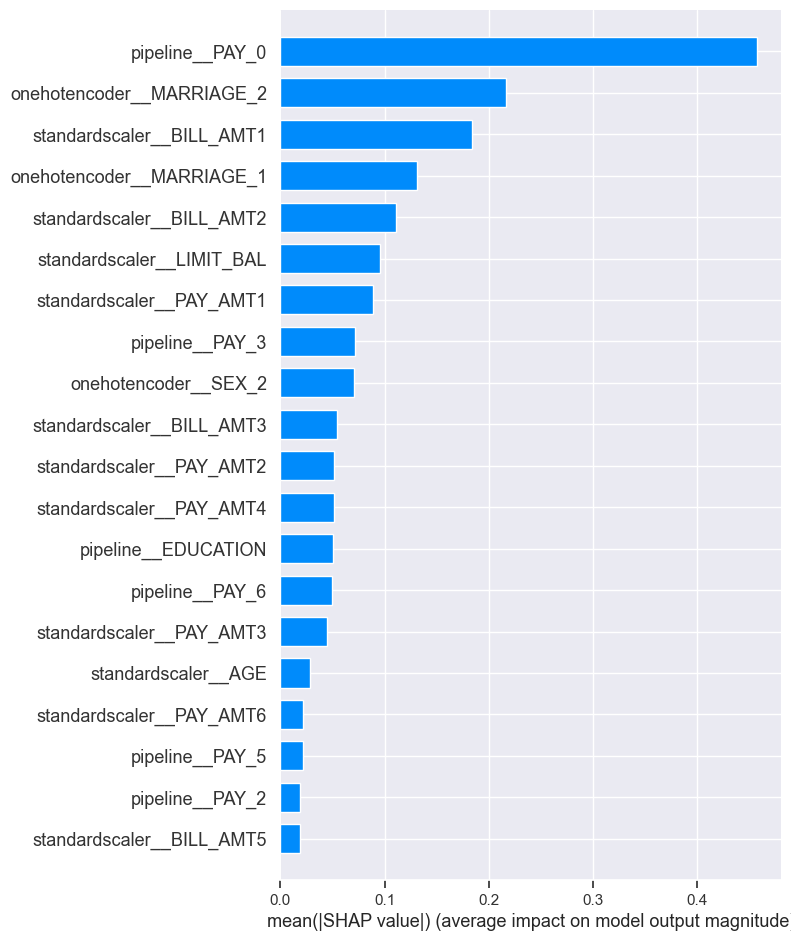

In [40]:
shap.summary_plot(train_shap_values, trainX_enc, plot_type="bar")

## Waterfall Plotting 

In [41]:
shap.initjs()

In [42]:
no_default_idx = 1
default_idx = 0

In [43]:
testX_enc.iloc[no_default_idx]
testY.iloc[no_default_idx]

0

In [44]:
model.predict(testX_enc)[no_default_idx]

0

In [45]:
model.predict_proba(testX_enc)[no_default_idx]

array([0.81806883, 0.18193117])

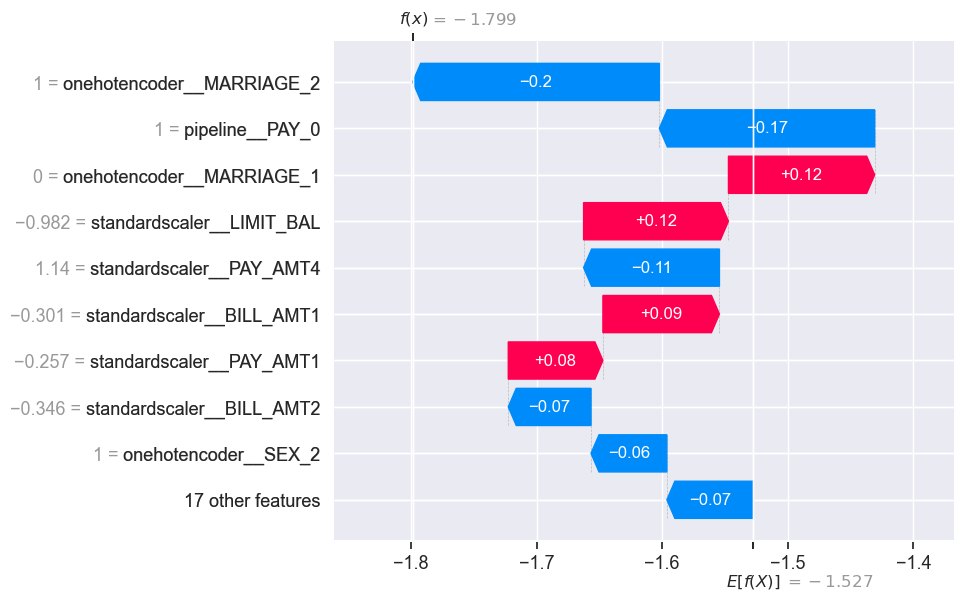

In [46]:
shap.plots.waterfall(test_shap_values[default_idx])

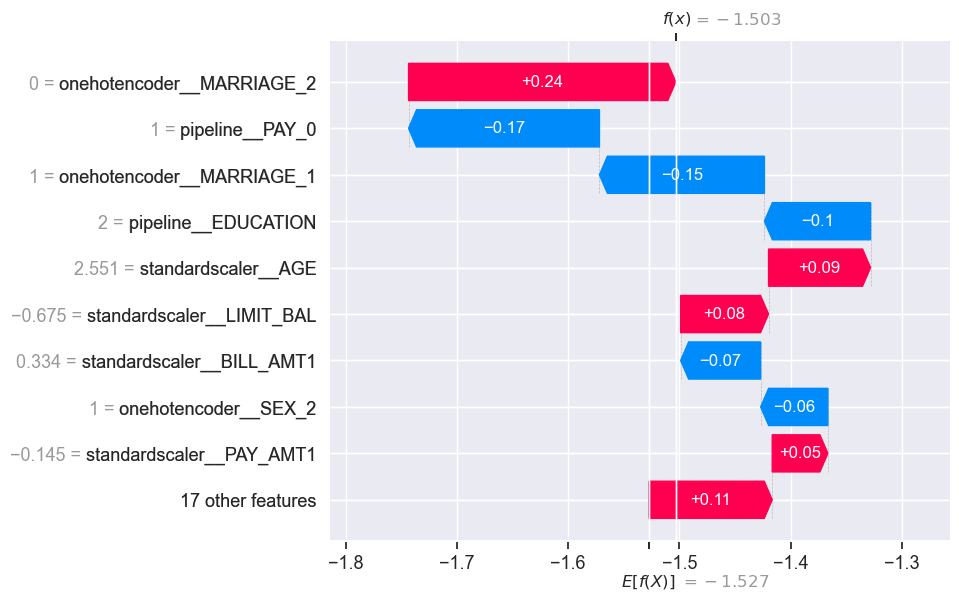

In [47]:
shap.plots.waterfall(test_shap_values[no_default_idx])

## Force Plot

In [63]:
shap.force_plot(explainer.expected_value, test_shap_values.values[no_default_idx, :], testX_enc.iloc[no_default_idx, :])

In [64]:
shap.force_plot(explainer.expected_value, test_shap_values.values[default_idx, :], testX_enc.iloc[default_idx, :])

## Summary

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
# Results from Section 8)
pd.DataFrame(results).T

In Section 8), we have came to the conclusion that the Logistic Regression model works best on our test data with a test score of

In [50]:
...

Ellipsis

12.1)

12.2) 

12.3) 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

### Comparison of 3 Non-Linear Model & Linear Model (Logic Regression)

In [61]:
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Random forests,4.523 (+/- 0.336),0.084 (+/- 0.017),0.814 (+/- 0.004),0.999 (+/- 0.000)
KNN Classifier,0.015 (+/- 0.015),0.581 (+/- 0.114),0.763 (+/- 0.003),0.791 (+/- 0.002)
SVM,21.031 (+/- 6.365),4.402 (+/- 0.337),0.819 (+/- 0.005),0.824 (+/- 0.001)
Logistic Regression,0.207 (+/- 0.025),0.021 (+/- 0.011),0.817 (+/- 0.003),0.817 (+/- 0.002)


Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.


In Data Preprocessing, we did not handling Missing Values,

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)